In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from create_plots import import_dataframe, show_stats, show_plots

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

Select the dataset name to evaluate:

In [2]:
#prefix="small_network"
#prefix="small_network_uniform"
#prefix="small_network_uniform_larger_msa"
#prefix="medium_network_norandom"
#prefix="medium_network_norandom_uniform"
#prefix="medium_network_norandom_uniform_larger_msa"
#prefix="small_network_uniform_big_msa"

prefix="small_network_new"
#prefix="medium_network_norandom_new"

In [3]:
print("This evaluation is for: " + prefix)

This evaluation is for: small_network_new


In [4]:
df = import_dataframe(prefix)
print(df.columns)

Index(['name', 'n_taxa', 'n_trees', 'n_reticulations', 'msa_size',
       'sites_per_tree', 'sampling_type', 'simulation_type', 'celine_params',
       'brlen_scaler', 'seqgen_params', 'near_zero_branches_raxml',
       'n_equal_tree_pairs', 'true_network_weirdness', 'true_network_path',
       'inferred_network_path', 'likelihood_type', 'brlen_linkage_type',
       'start_type', 'timeout', 'n_random_start_networks',
       'n_parsimony_start_networks', 'runtime_inference',
       'n_reticulations_inferred', 'bic_true', 'logl_true', 'bic_inferred',
       'logl_inferred', 'bic_raxml', 'logl_raxml', 'rf_absolute_raxml',
       'rf_relative_raxml', 'rf_absolute_inferred', 'rf_relative_inferred',
       'hardwired_cluster_distance', 'softwired_cluster_distance',
       'displayed_trees_distance', 'tripartition_distance',
       'nested_labels_distance', 'path_multiplicity_distance', 'bic_diff',
       'logl_diff'],
      dtype='object')


# Original Simulated Dataset Statistics 

<Figure size 1200x800 with 0 Axes>

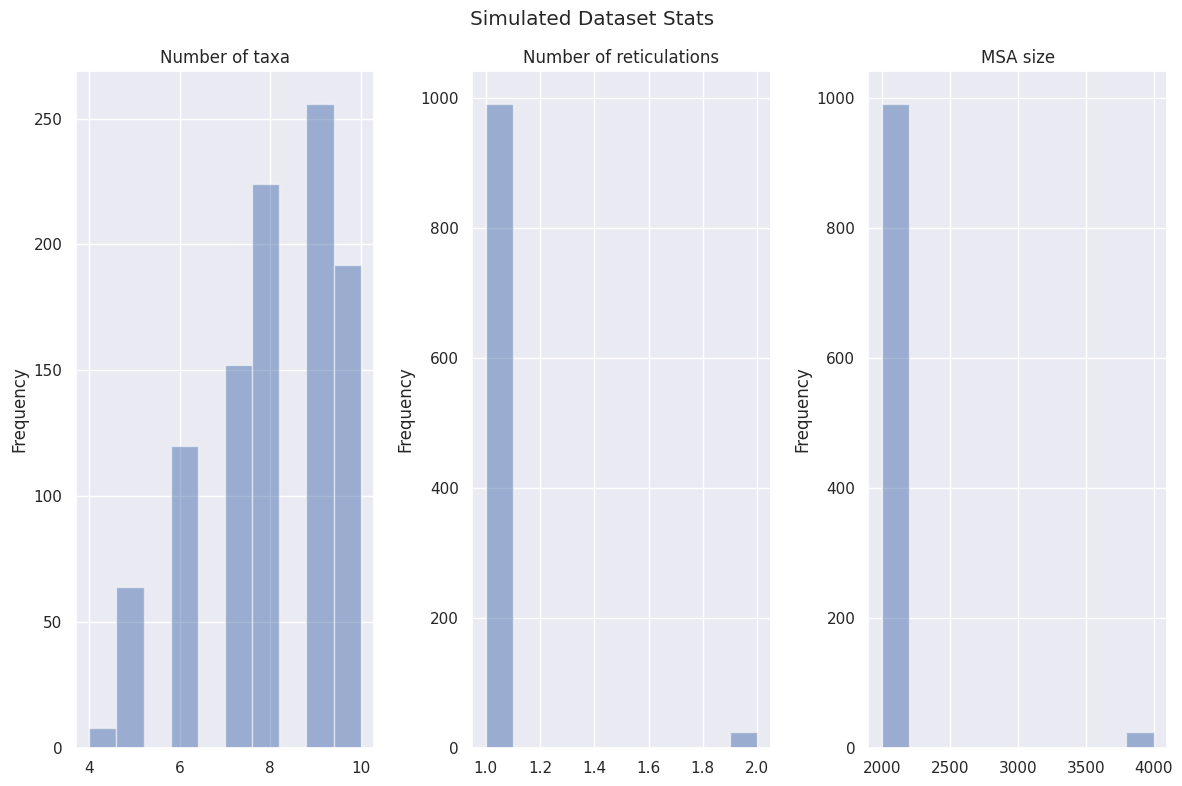

<Figure size 1200x800 with 0 Axes>

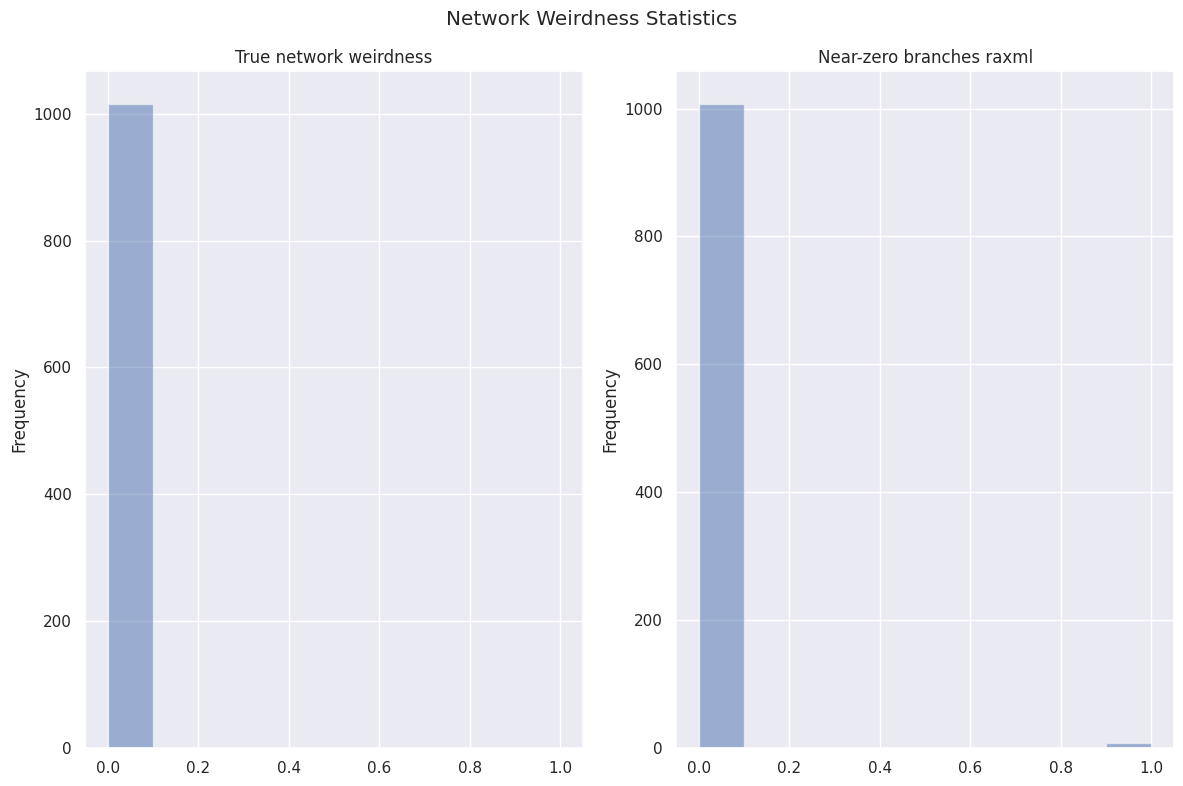

In [5]:
show_stats(df)

# Simulated dataset statistics after removing all "weird" networks and filtering out too tiny MSAs

<Figure size 1200x800 with 0 Axes>

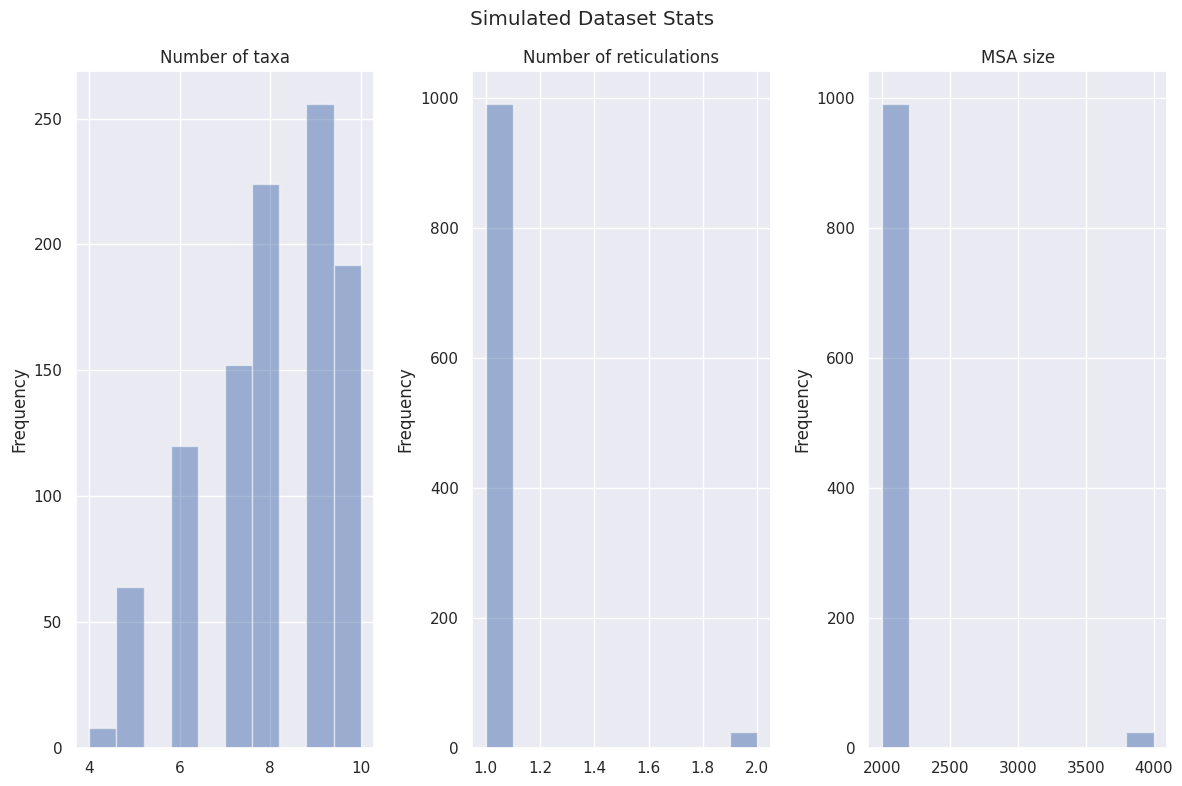

<Figure size 1200x800 with 0 Axes>

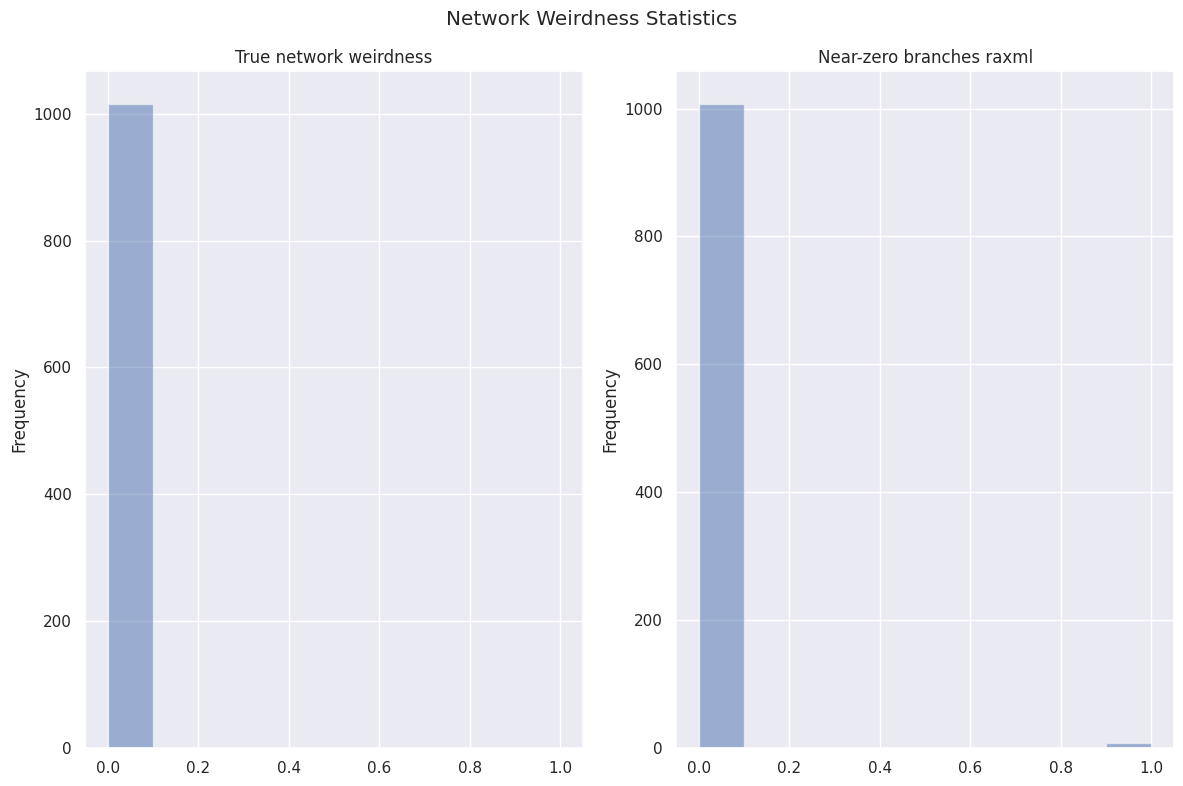

In [6]:
df_nonweird = df.query('(true_network_weirdness == 0.0) & msa_size >= 400')
show_stats(df_nonweird)

# Evaluation starting from raxml-ng best tree

+--------------------------------+------------------------+---------------------+---------------+
|                                | LikelihoodType.AVERAGE | LikelihoodType.BEST |    Overall    |
+--------------------------------+------------------------+---------------------+---------------+
|  Inferred BIC better or equal  |     125 (49.21 %)      |    131 (51.57 %)    | 256 (50.39 %) |
|       Inferred BIC worse       |     129 (50.79 %)      |    123 (48.43 %)    | 252 (49.61 %) |
| Inferred logl better or equal  |      98 (38.58 %)      |    107 (42.13 %)    | 205 (40.35 %) |
|      Inferred logl worse       |     156 (61.42 %)      |    147 (57.87 %)    | 303 (59.65 %) |
| Inferred n_reticulations less  |      84 (33.07 %)      |     85 (33.46 %)    | 169 (33.27 %) |
| Inferred n_reticulations equal |     161 (63.39 %)      |    161 (63.39 %)    | 322 (63.39 %) |
| Inferred n_reticulations more  |       9 (3.54 %)       |      8 (3.15 %)     |  17 (3.35 %)  |
+-------------------

<Figure size 1200x800 with 0 Axes>

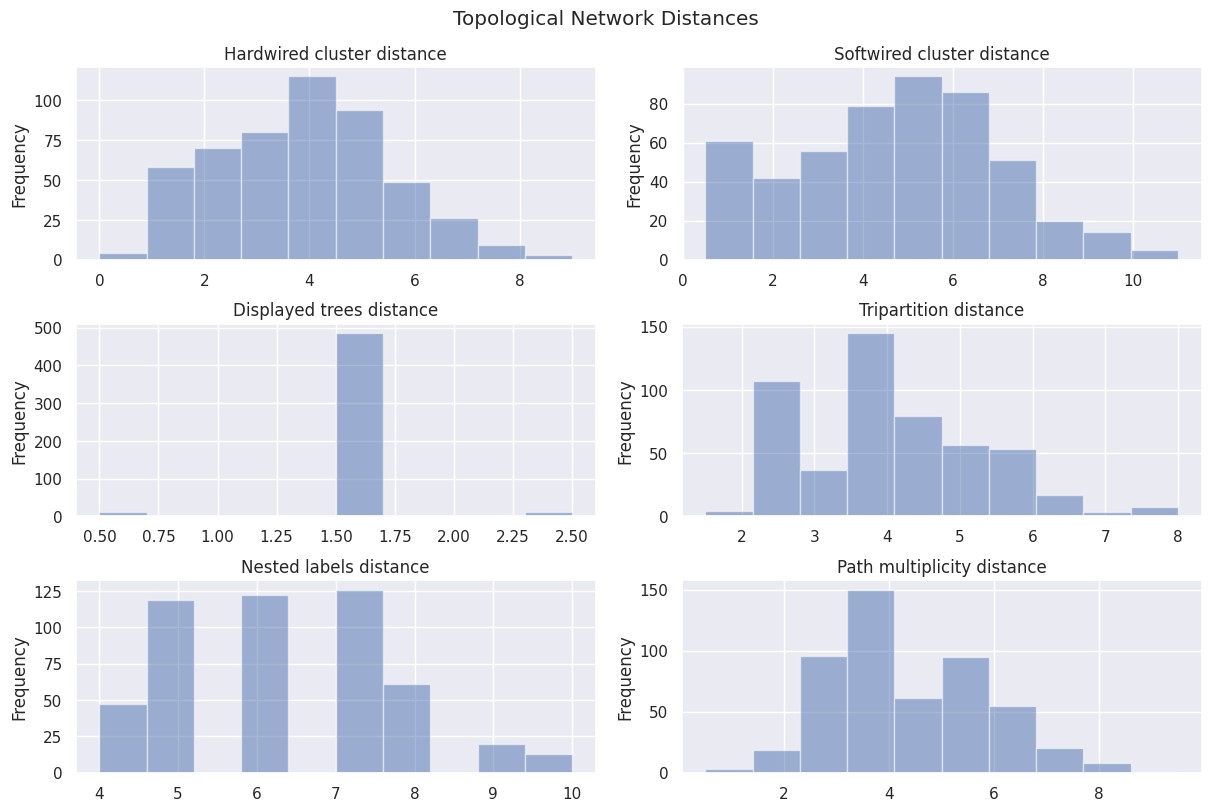

In [7]:
df_nonweird_start_from_raxml = df_nonweird.query('start_type == "FROM_RAXML"')
if len(df_nonweird_start_from_raxml) > 0:
    show_plots(df_nonweird_start_from_raxml)
else:
    print("No data found for StartType.FROM_RAXML")

## Evaluation starting from raxml-ng best tree, by brlen_scaling factor


Evaluation for brlen scaling factor 1.0:

+--------------------------------+------------------------+---------------------+---------------+
|                                | LikelihoodType.AVERAGE | LikelihoodType.BEST |    Overall    |
+--------------------------------+------------------------+---------------------+---------------+
|  Inferred BIC better or equal  |      55 (43.31 %)      |     64 (50.39 %)    | 119 (46.85 %) |
|       Inferred BIC worse       |      72 (56.69 %)      |     63 (49.61 %)    | 135 (53.15 %) |
| Inferred logl better or equal  |      40 (31.50 %)      |     51 (40.16 %)    |  91 (35.83 %) |
|      Inferred logl worse       |      87 (68.50 %)      |     76 (59.84 %)    | 163 (64.17 %) |
| Inferred n_reticulations less  |      49 (38.58 %)      |     49 (38.58 %)    |  98 (38.58 %) |
| Inferred n_reticulations equal |      73 (57.48 %)      |     71 (55.91 %)    | 144 (56.69 %) |
| Inferred n_reticulations more  |       5 (3.94 %)       |      7 (5.51 %)

<Figure size 1200x800 with 0 Axes>

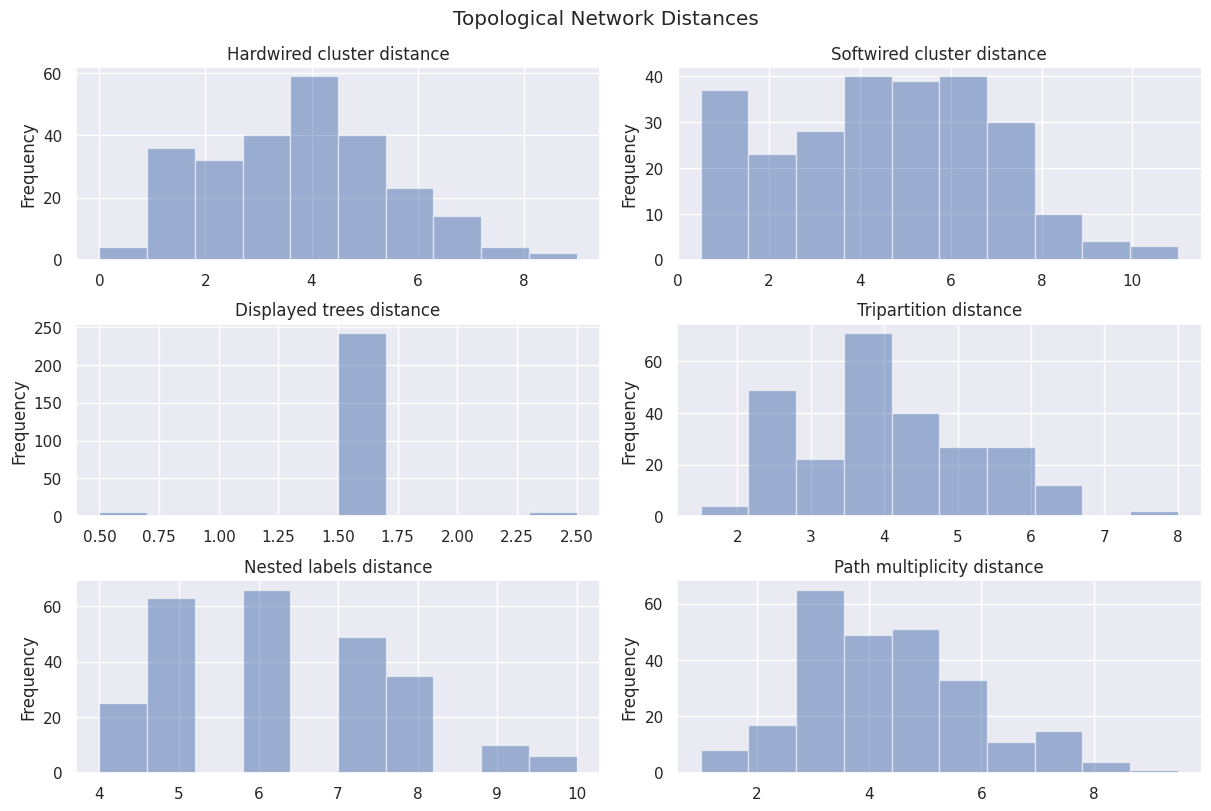


Evaluation for brlen scaling factor 2.0:

+--------------------------------+------------------------+---------------------+---------------+
|                                | LikelihoodType.AVERAGE | LikelihoodType.BEST |    Overall    |
+--------------------------------+------------------------+---------------------+---------------+
|  Inferred BIC better or equal  |      70 (55.12 %)      |     67 (52.76 %)    | 137 (53.94 %) |
|       Inferred BIC worse       |      57 (44.88 %)      |     60 (47.24 %)    | 117 (46.06 %) |
| Inferred logl better or equal  |      58 (45.67 %)      |     56 (44.09 %)    | 114 (44.88 %) |
|      Inferred logl worse       |      69 (54.33 %)      |     71 (55.91 %)    | 140 (55.12 %) |
| Inferred n_reticulations less  |      35 (27.56 %)      |     36 (28.35 %)    |  71 (27.95 %) |
| Inferred n_reticulations equal |      88 (69.29 %)      |     90 (70.87 %)    | 178 (70.08 %) |
| Inferred n_reticulations more  |       4 (3.15 %)       |      1 (0.79 %)

<Figure size 1200x800 with 0 Axes>

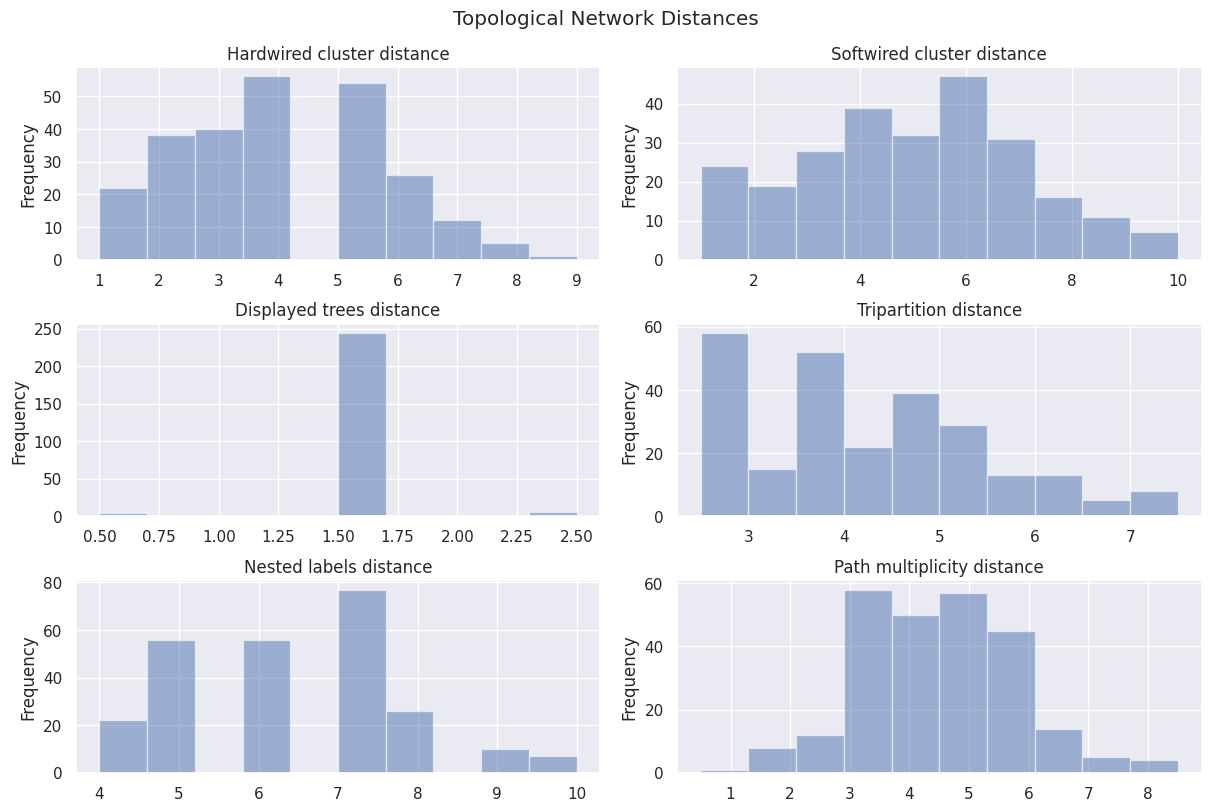

In [8]:
if 'brlen_scaler' in df_nonweird_start_from_raxml:
    scalers = df_nonweird_start_from_raxml.brlen_scaler.unique()
    for scaler in scalers:
        print("===========================================================\n")
        print("Evaluation for brlen scaling factor " + str(scaler) + ":\n")
        df_nonweird_start_from_raxml_scaled = df_nonweird_start_from_raxml.query('brlen_scaler == ' + str(scaler))
        show_plots(df_nonweird_start_from_raxml_scaled)

# Evaluation starting from 5 random + 5 parsimony trees

+--------------------------------+------------------------+---------------------+---------------+
|                                | LikelihoodType.AVERAGE | LikelihoodType.BEST |    Overall    |
+--------------------------------+------------------------+---------------------+---------------+
|  Inferred BIC better or equal  |     219 (86.22 %)      |    221 (87.01 %)    | 440 (86.61 %) |
|       Inferred BIC worse       |      35 (13.78 %)      |     33 (12.99 %)    |  68 (13.39 %) |
| Inferred logl better or equal  |     193 (75.98 %)      |    194 (76.38 %)    | 387 (76.18 %) |
|      Inferred logl worse       |      61 (24.02 %)      |     60 (23.62 %)    | 121 (23.82 %) |
| Inferred n_reticulations less  |      36 (14.17 %)      |     35 (13.78 %)    |  71 (13.98 %) |
| Inferred n_reticulations equal |     217 (85.43 %)      |    219 (86.22 %)    | 436 (85.83 %) |
| Inferred n_reticulations more  |       1 (0.39 %)       |      0 (0.00 %)     |   1 (0.20 %)  |
+-------------------

<Figure size 1200x800 with 0 Axes>

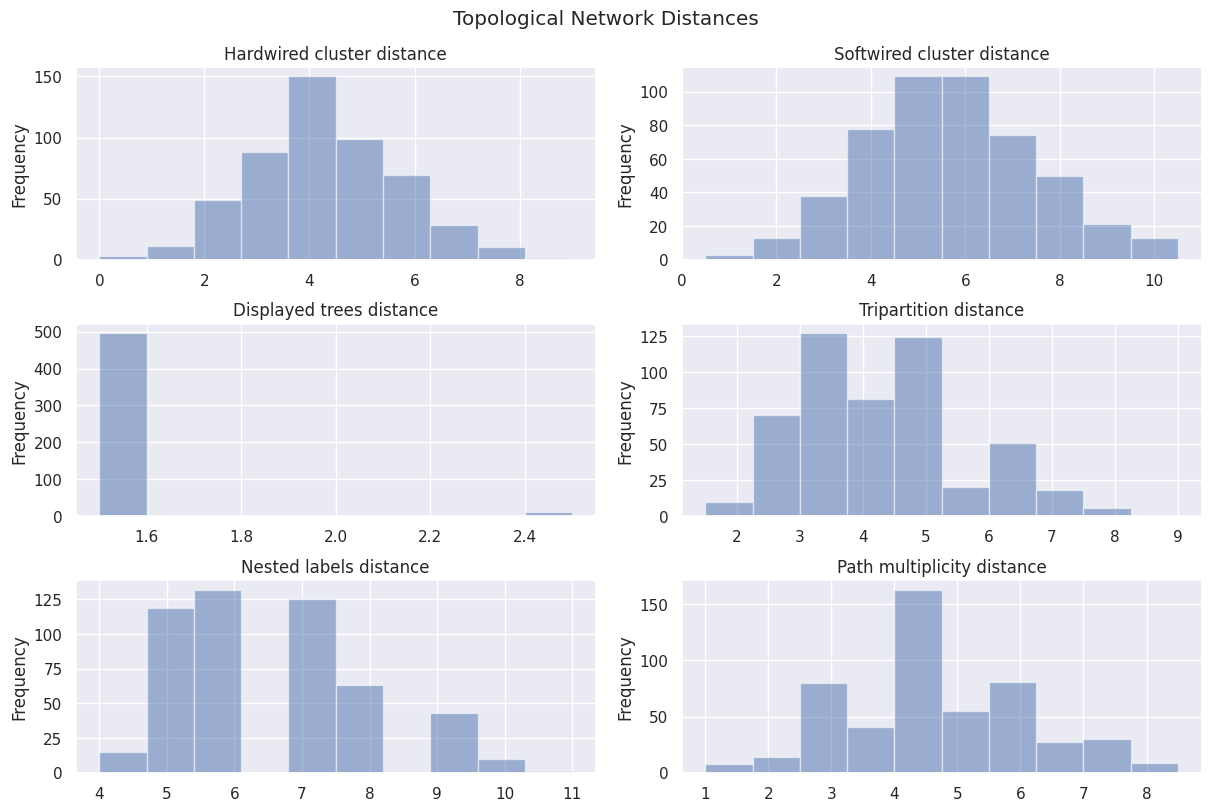

In [9]:
df_nonweird_random = df_nonweird.query('start_type == "RANDOM"')

if len(df_nonweird_random) > 0:
    show_plots(df_nonweird_random)
else:
    print("No data found for StartType.RANDOM")

## Evaluation starting from 5 random + 5 parsimony trees, by brlen_scaling factor


Evaluation for brlen scaling factor 1.0:

+--------------------------------+------------------------+---------------------+---------------+
|                                | LikelihoodType.AVERAGE | LikelihoodType.BEST |    Overall    |
+--------------------------------+------------------------+---------------------+---------------+
|  Inferred BIC better or equal  |     108 (85.04 %)      |    110 (86.61 %)    | 218 (85.83 %) |
|       Inferred BIC worse       |      19 (14.96 %)      |     17 (13.39 %)    |  36 (14.17 %) |
| Inferred logl better or equal  |      94 (74.02 %)      |     95 (74.80 %)    | 189 (74.41 %) |
|      Inferred logl worse       |      33 (25.98 %)      |     32 (25.20 %)    |  65 (25.59 %) |
| Inferred n_reticulations less  |      20 (15.75 %)      |     19 (14.96 %)    |  39 (15.35 %) |
| Inferred n_reticulations equal |     106 (83.46 %)      |    108 (85.04 %)    | 214 (84.25 %) |
| Inferred n_reticulations more  |       1 (0.79 %)       |      0 (0.00 %)

<Figure size 1200x800 with 0 Axes>

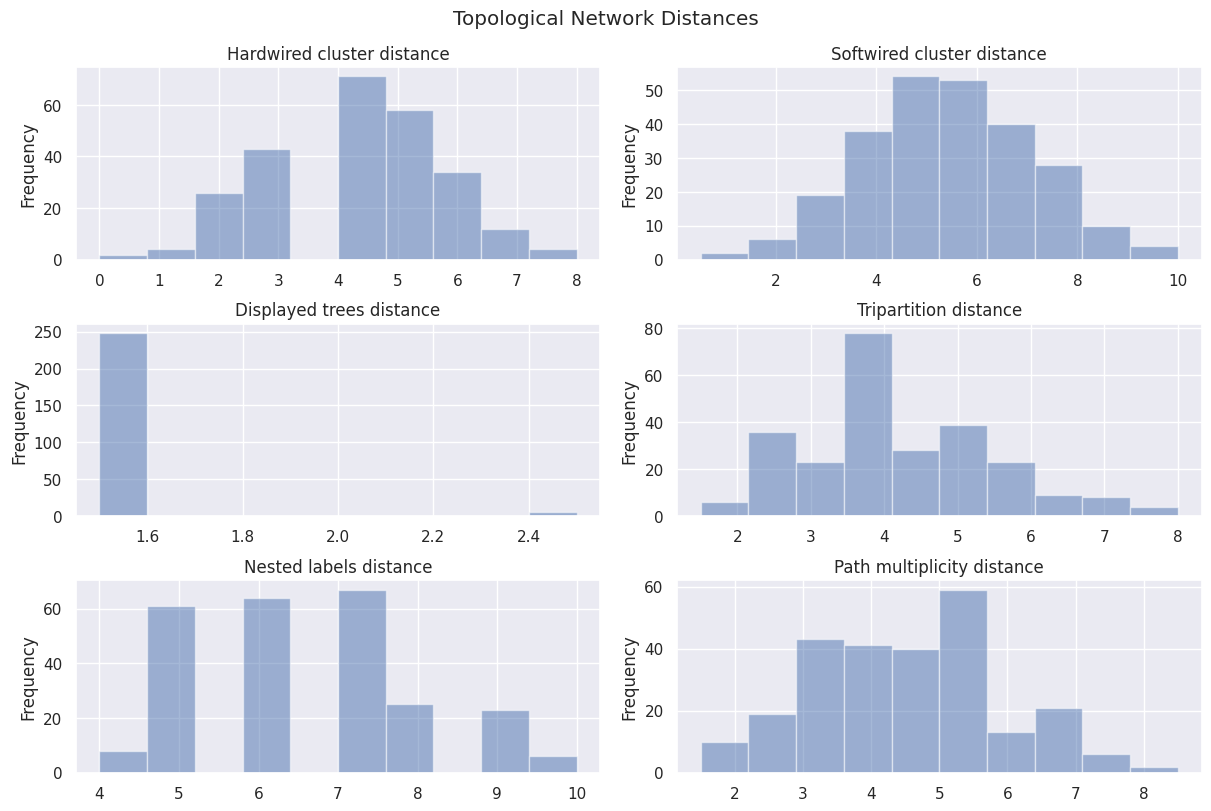


Evaluation for brlen scaling factor 2.0:

+--------------------------------+------------------------+---------------------+---------------+
|                                | LikelihoodType.AVERAGE | LikelihoodType.BEST |    Overall    |
+--------------------------------+------------------------+---------------------+---------------+
|  Inferred BIC better or equal  |     111 (87.40 %)      |    111 (87.40 %)    | 222 (87.40 %) |
|       Inferred BIC worse       |      16 (12.60 %)      |     16 (12.60 %)    |  32 (12.60 %) |
| Inferred logl better or equal  |      99 (77.95 %)      |     99 (77.95 %)    | 198 (77.95 %) |
|      Inferred logl worse       |      28 (22.05 %)      |     28 (22.05 %)    |  56 (22.05 %) |
| Inferred n_reticulations less  |      16 (12.60 %)      |     16 (12.60 %)    |  32 (12.60 %) |
| Inferred n_reticulations equal |     111 (87.40 %)      |    111 (87.40 %)    | 222 (87.40 %) |
| Inferred n_reticulations more  |       0 (0.00 %)       |      0 (0.00 %)

<Figure size 1200x800 with 0 Axes>

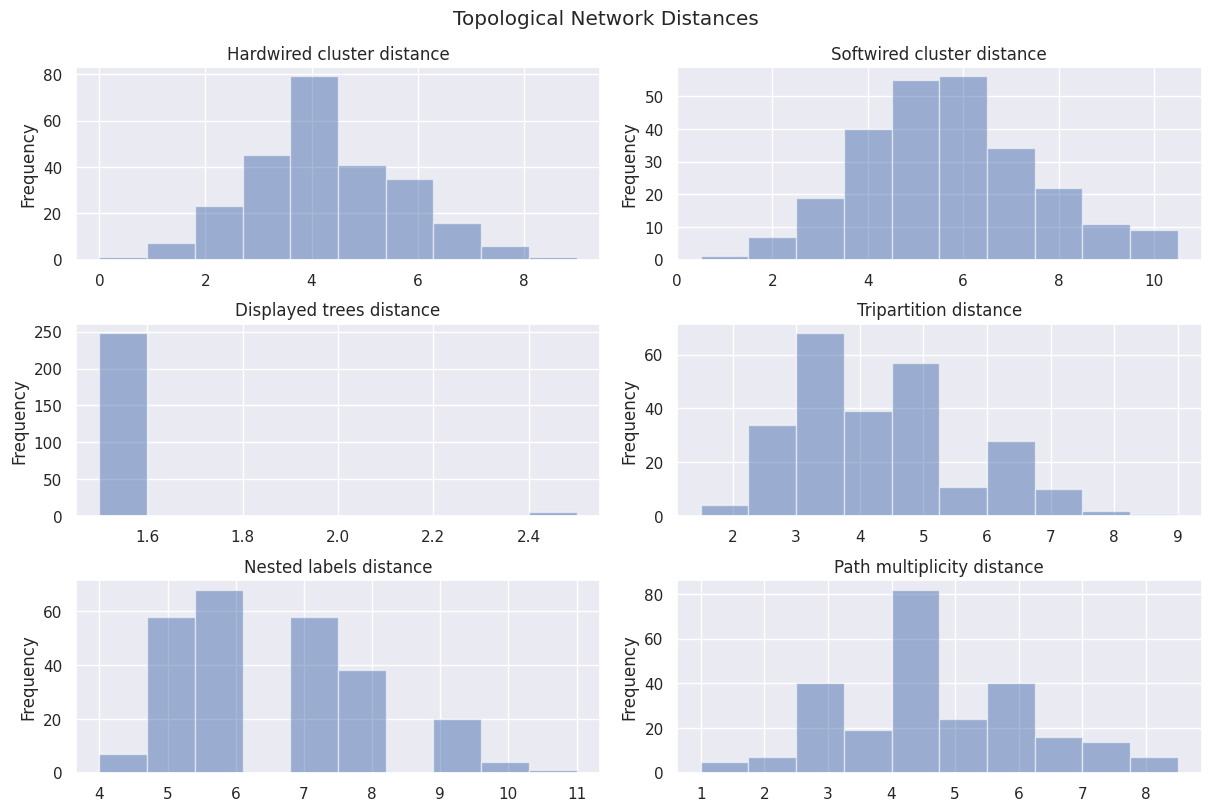

In [10]:
if 'brlen_scaler' in df_nonweird_random:
    scalers = df_nonweird_random.brlen_scaler.unique()
    for scaler in scalers:
        print("===========================================================\n")
        print("Evaluation for brlen scaling factor " + str(scaler) + ":\n")
        df_nonweird_random_scaled = df_nonweird_random.query('brlen_scaler == ' + str(scaler))
        show_plots(df_nonweird_random_scaled)